Production template

# Salish Sea NEMO Model Daily Nowcast Figures for Sea Surface Height

# Set-up

In [1]:
from __future__ import division

import datetime
from glob import glob
import os

from IPython.core.display import HTML
import netCDF4 as nc
import scipy.io as sio

from salishsea_tools.nowcast import figures

%matplotlib inline

In [2]:
def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])

In [3]:
run_date = datetime.datetime(2015,10,31)
# Results dataset location
results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())
# model winds
model_path = '/ocean/sallen/allen/research/MEOPAR/Operational/'
coastline = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')

Load the results datasets:

In [4]:
grid_T_hr = results_dataset('1h', 'grid_T', results_dir)

grids={}
names = ['Point Atkinson', 'Victoria', 'Campbell River']
for name in names:
    f = os.path.join(results_dir,'{}.nc'.format(name.replace(" ", "")))
    print(f)
    grids[name] = nc.Dataset(f)

/data/dlatorne/MEOPAR/SalishSea/nowcast/31oct15/PointAtkinson.nc
/data/dlatorne/MEOPAR/SalishSea/nowcast/31oct15/Victoria.nc
/data/dlatorne/MEOPAR/SalishSea/nowcast/31oct15/CampbellRiver.nc


In [5]:
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

Display the figures:

In [6]:
HTML('<h2>{:%d%b%y} Figures</h2>'.format(run_date))

## Point Atkinson water levels

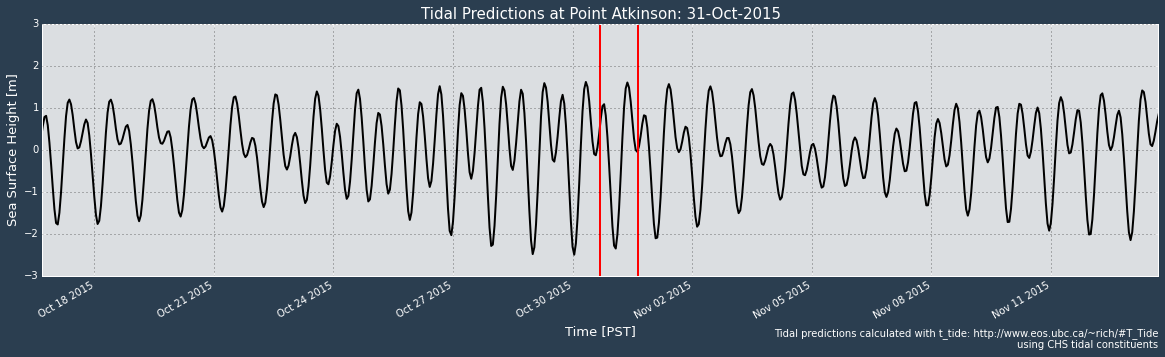

In [7]:

fig = figures.PA_tidal_predictions(grid_T_hr)

Tidal predictions calculated with t_tide: http://www.eos.ubc.ca/~rich/#T_Tide

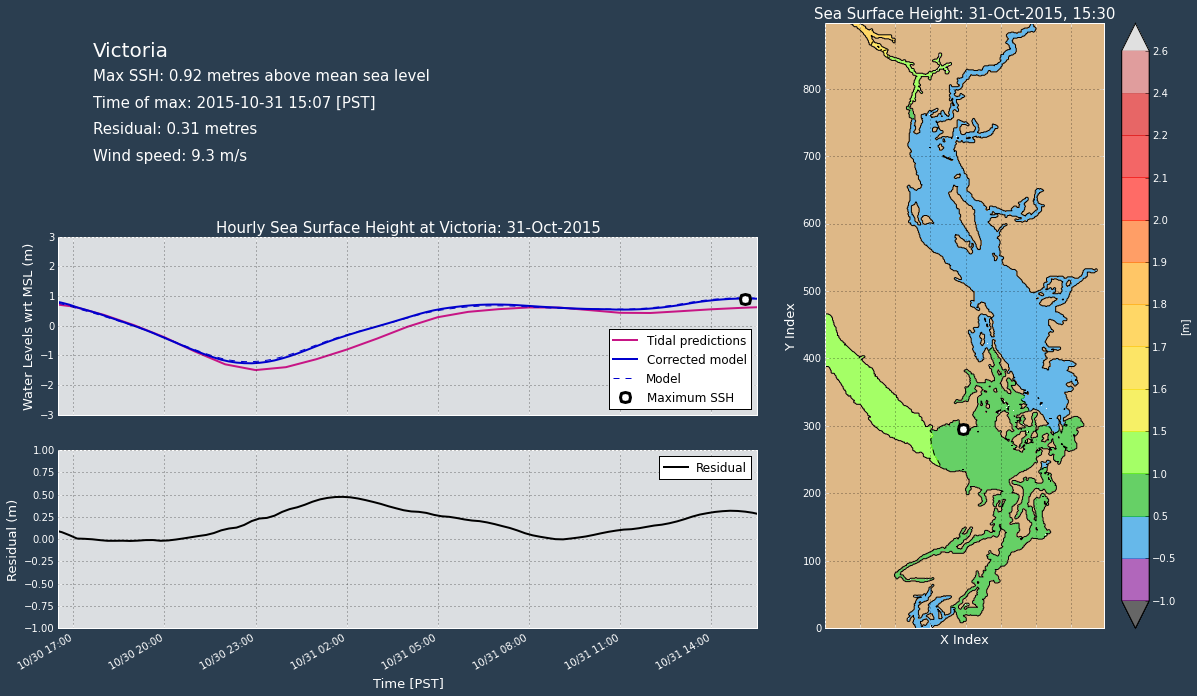

In [8]:

fig = figures.compare_tidalpredictions_maxSSH(grid_T_hr, bathy, grids, model_path, name = "Victoria")

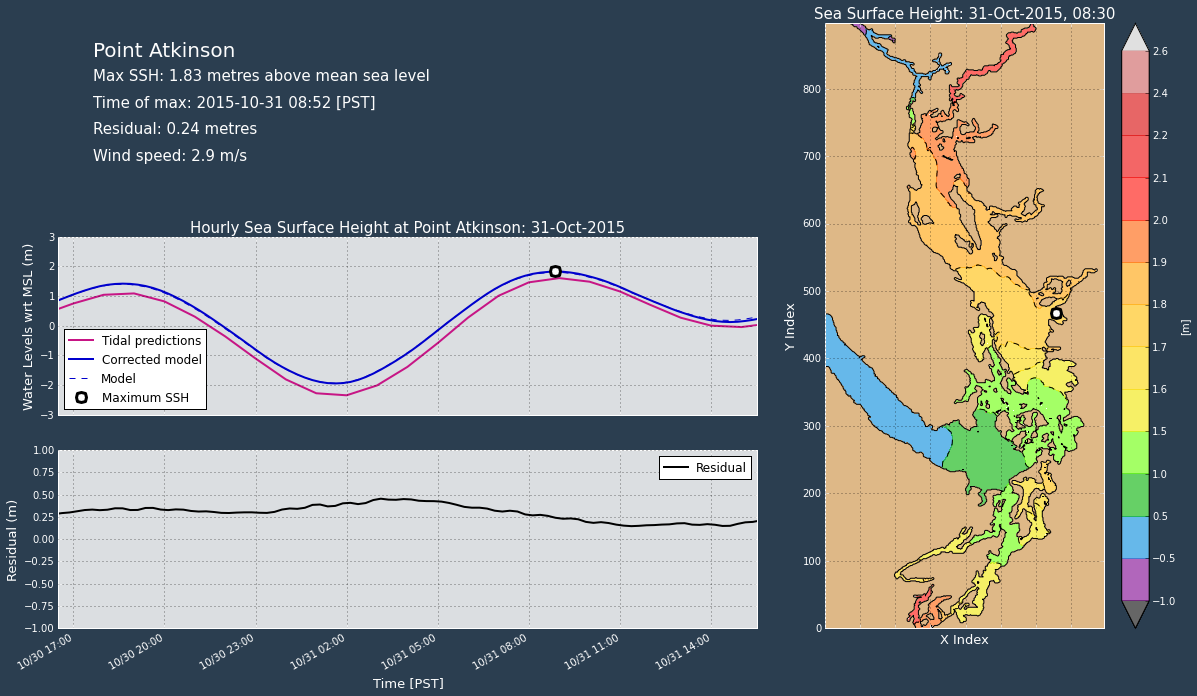

In [9]:
fig = figures.compare_tidalpredictions_maxSSH(grid_T_hr, bathy, grids, model_path)

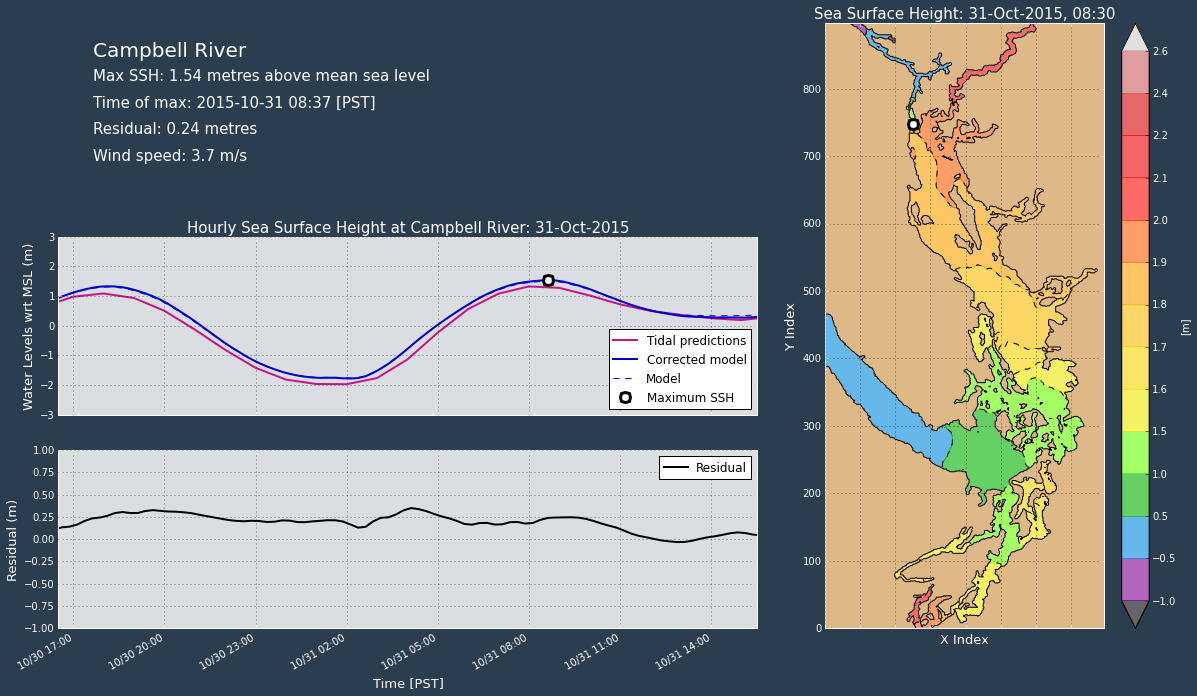

In [10]:
fig = figures.compare_tidalpredictions_maxSSH(grid_T_hr, bathy, grids, model_path, name="Campbell River")

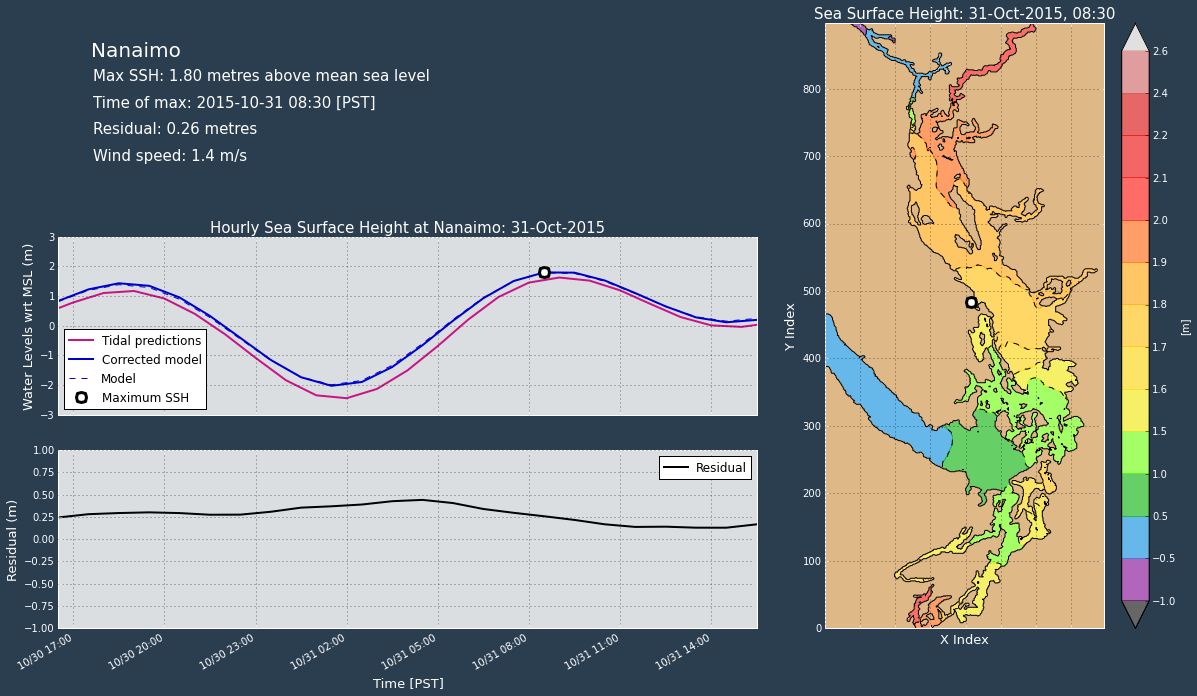

In [11]:
fig = figures.compare_tidalpredictions_maxSSH(grid_T_hr, bathy, grids, model_path, name="Nanaimo")

## Water levels at NOAA stations

Observed water levels from NOAA: http://tidesandcurrents.noaa.gov/stations.html?type=Water+Levels

To do: 
1. Similar map for Victoria, Point Atkinson, Campbell River but in PST and shifted by mean sea level. Look up reasonable thresholds (one could be highest tide at these locations, two could be max water level ever observed).

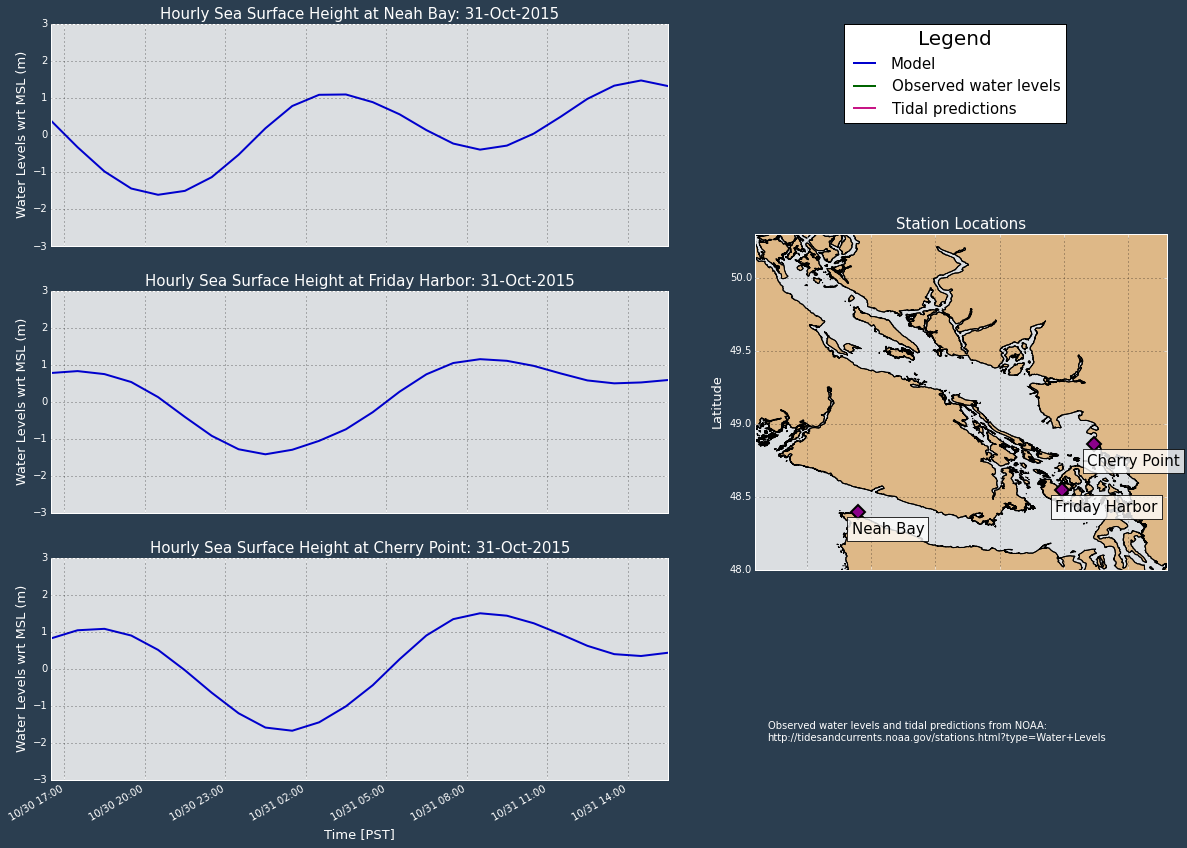

In [12]:

fig = figures.compare_water_levels(grid_T_hr, bathy, coastline)

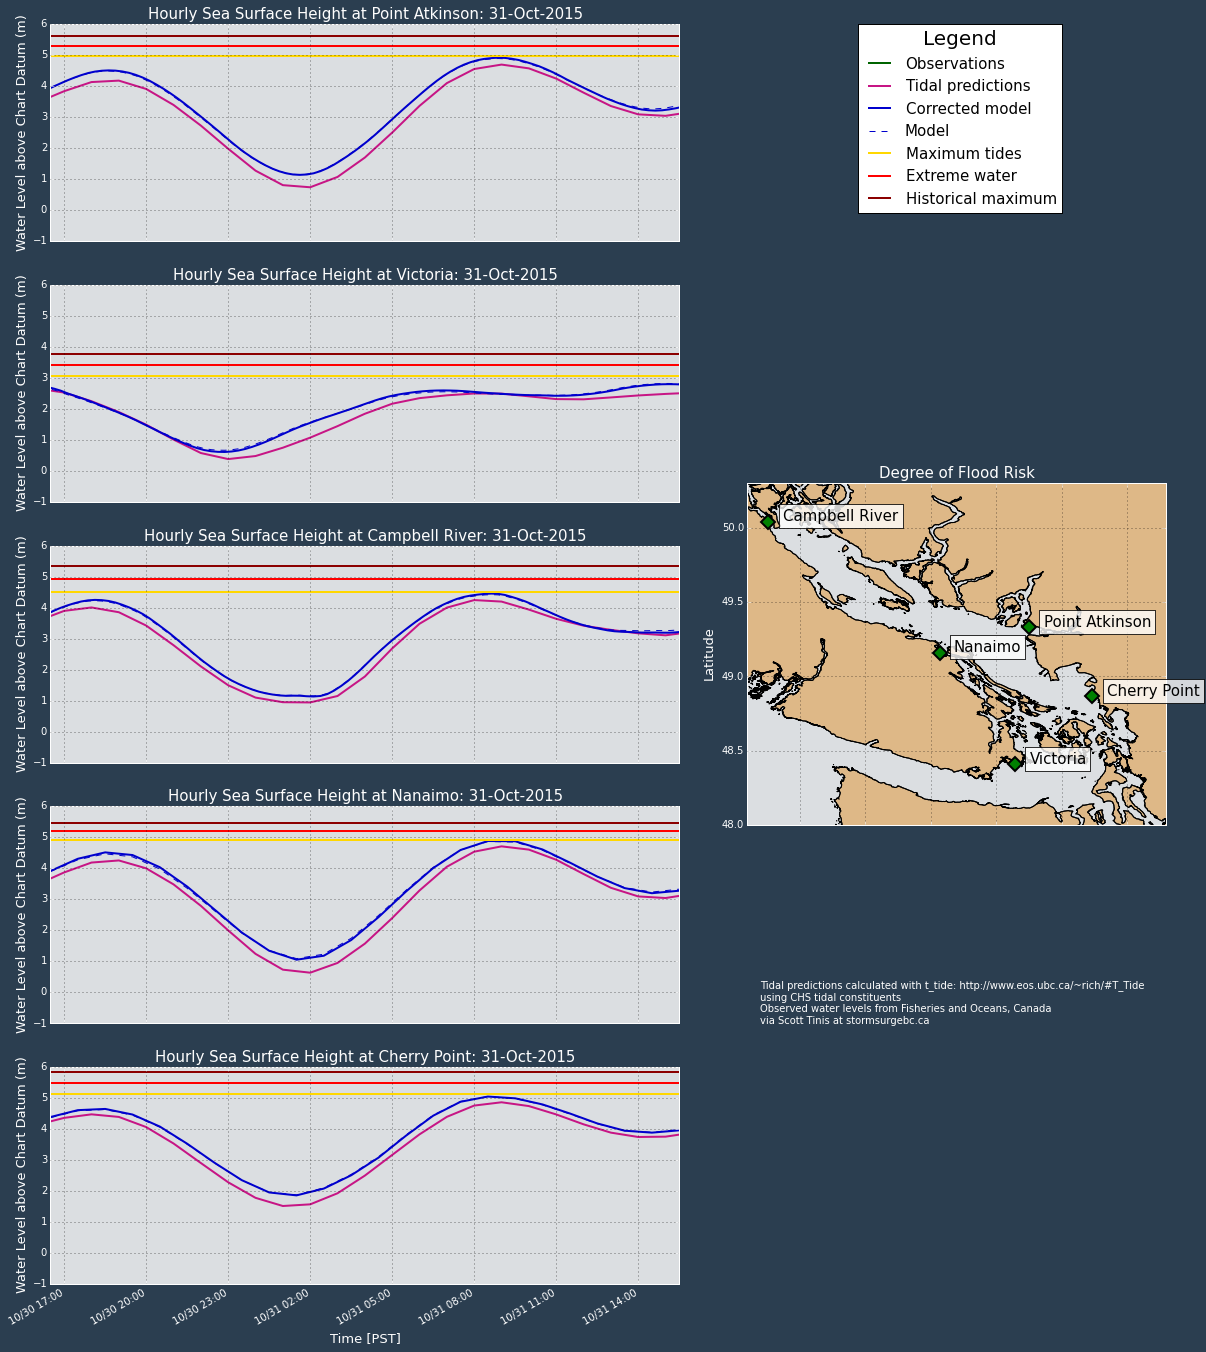

In [13]:

fig = figures.plot_thresholds_all(grid_T_hr, bathy, grids, model_path, coastline)

Fix thresholds

## Weather

Observations from Environment Canada data. http://climate.weather.gc.ca/

Modelled winds are from the High Resolution Deterministic Prediction System of Environment Canada.
https://weather.gc.ca/grib/grib2_HRDPS_HR_e.html


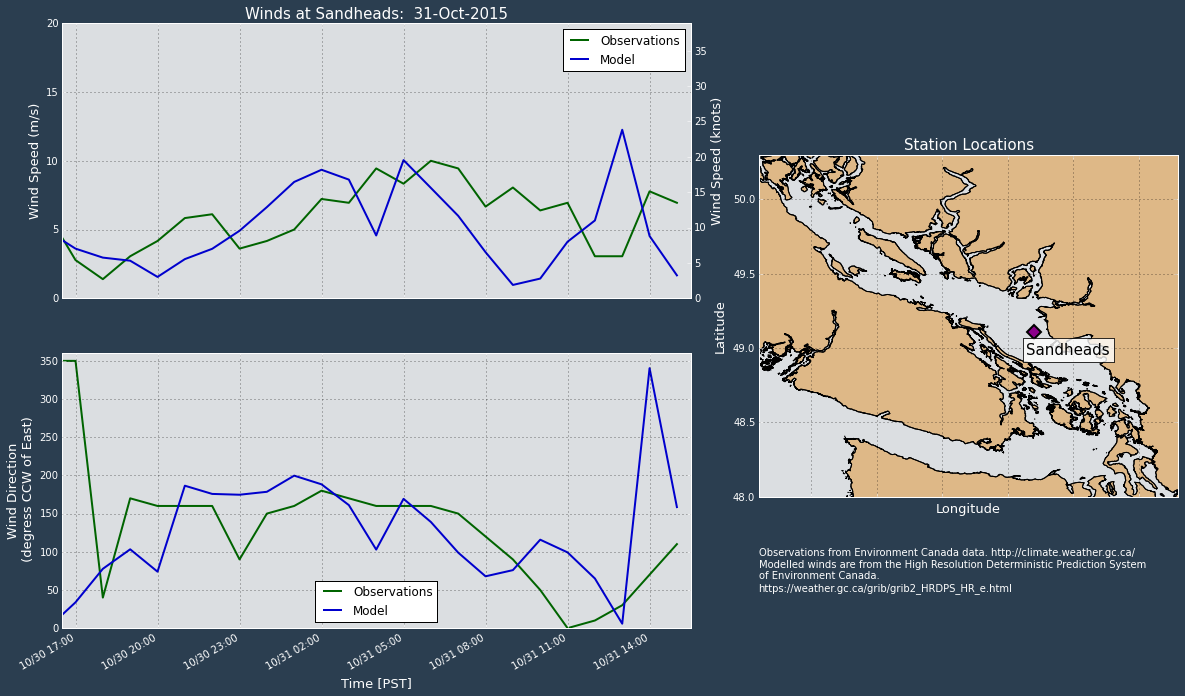

In [14]:

fig = figures.Sandheads_winds(grid_T_hr,bathy,model_path, coastline)

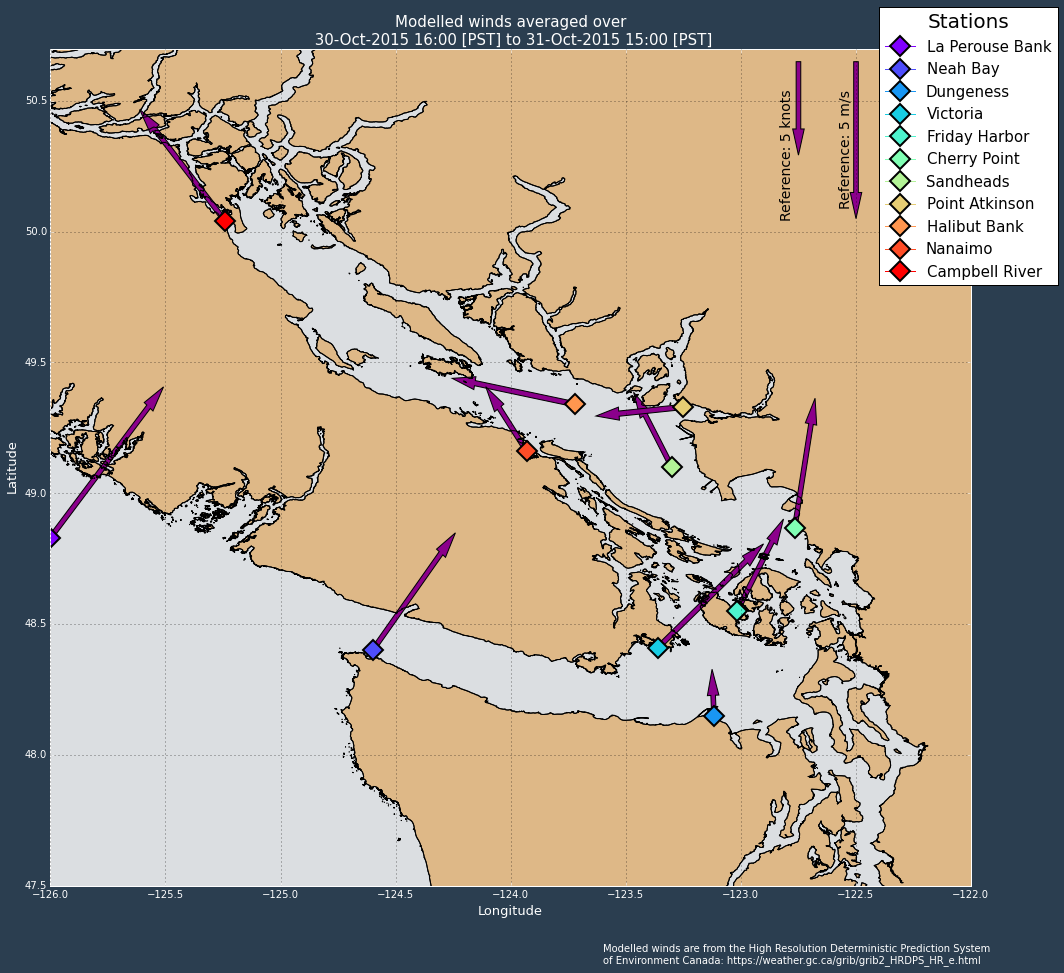

In [15]:

fig = figures.winds_average_max(grid_T_hr, bathy, model_path, coastline, station ='all', wind_type = 'average')

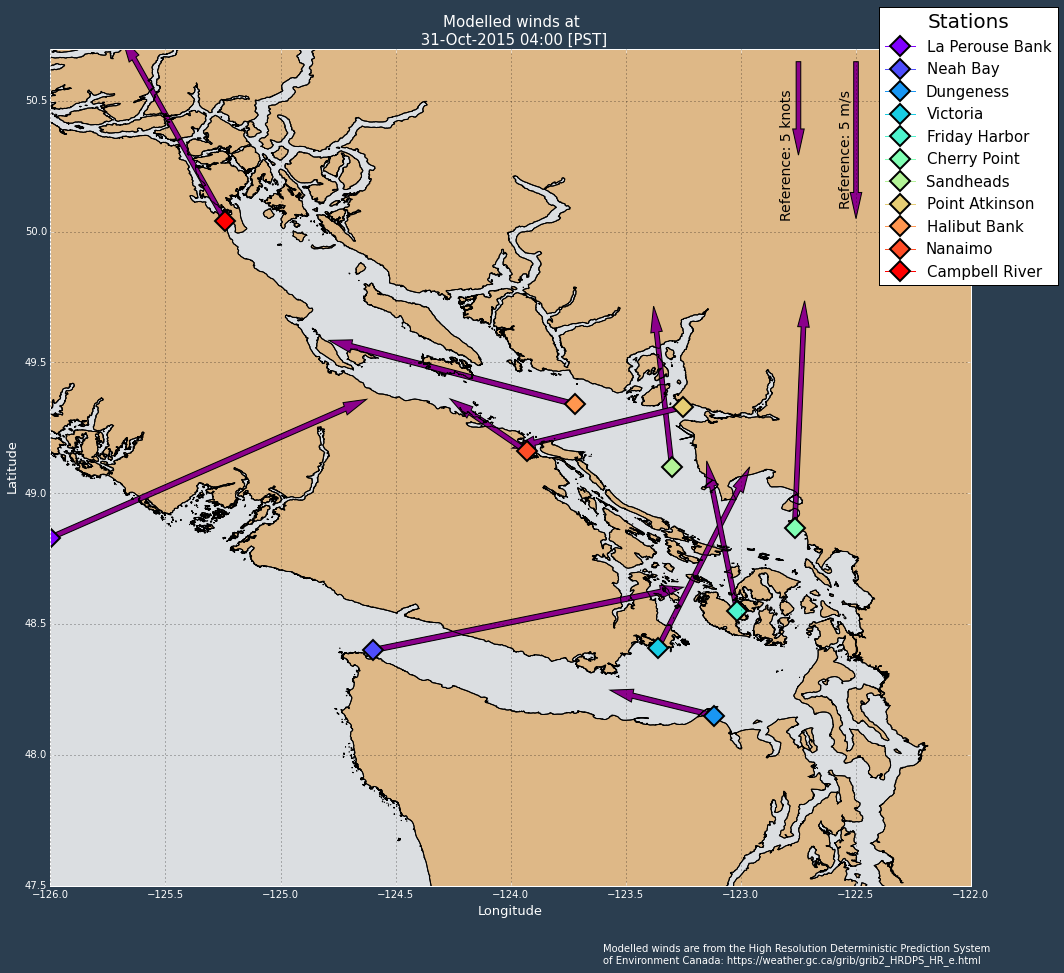

In [16]:

fig = figures.winds_average_max(grid_T_hr, bathy, model_path, coastline, station = 'all', wind_type = 'max')

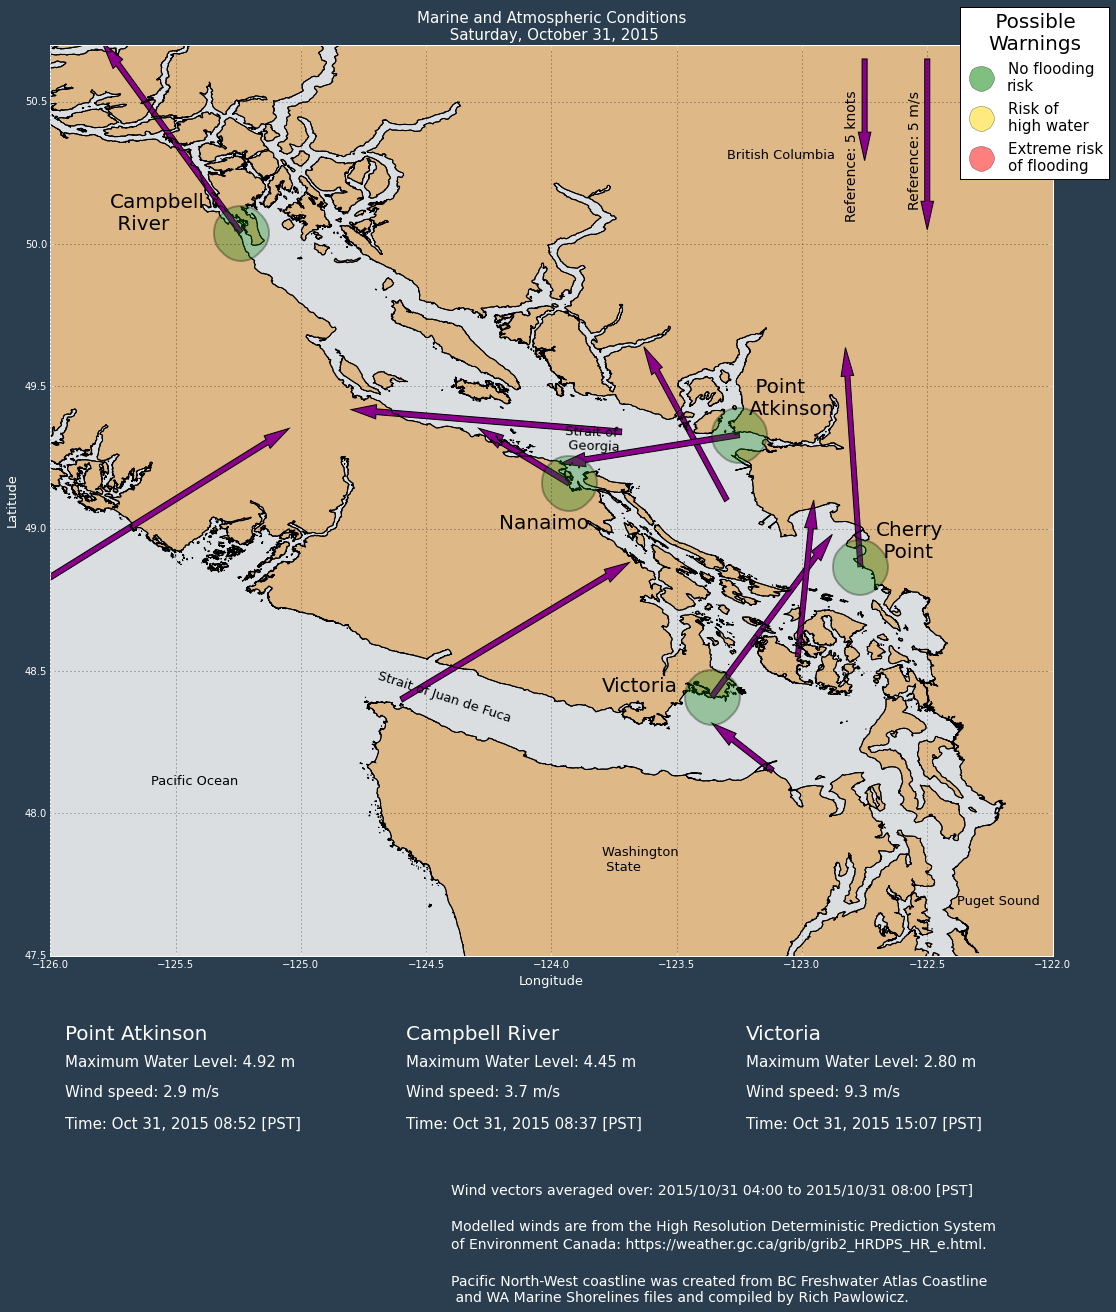

In [17]:

fig=figures.plot_threshold_website(bathy, grid_T_hr, grids, model_path,coastline)

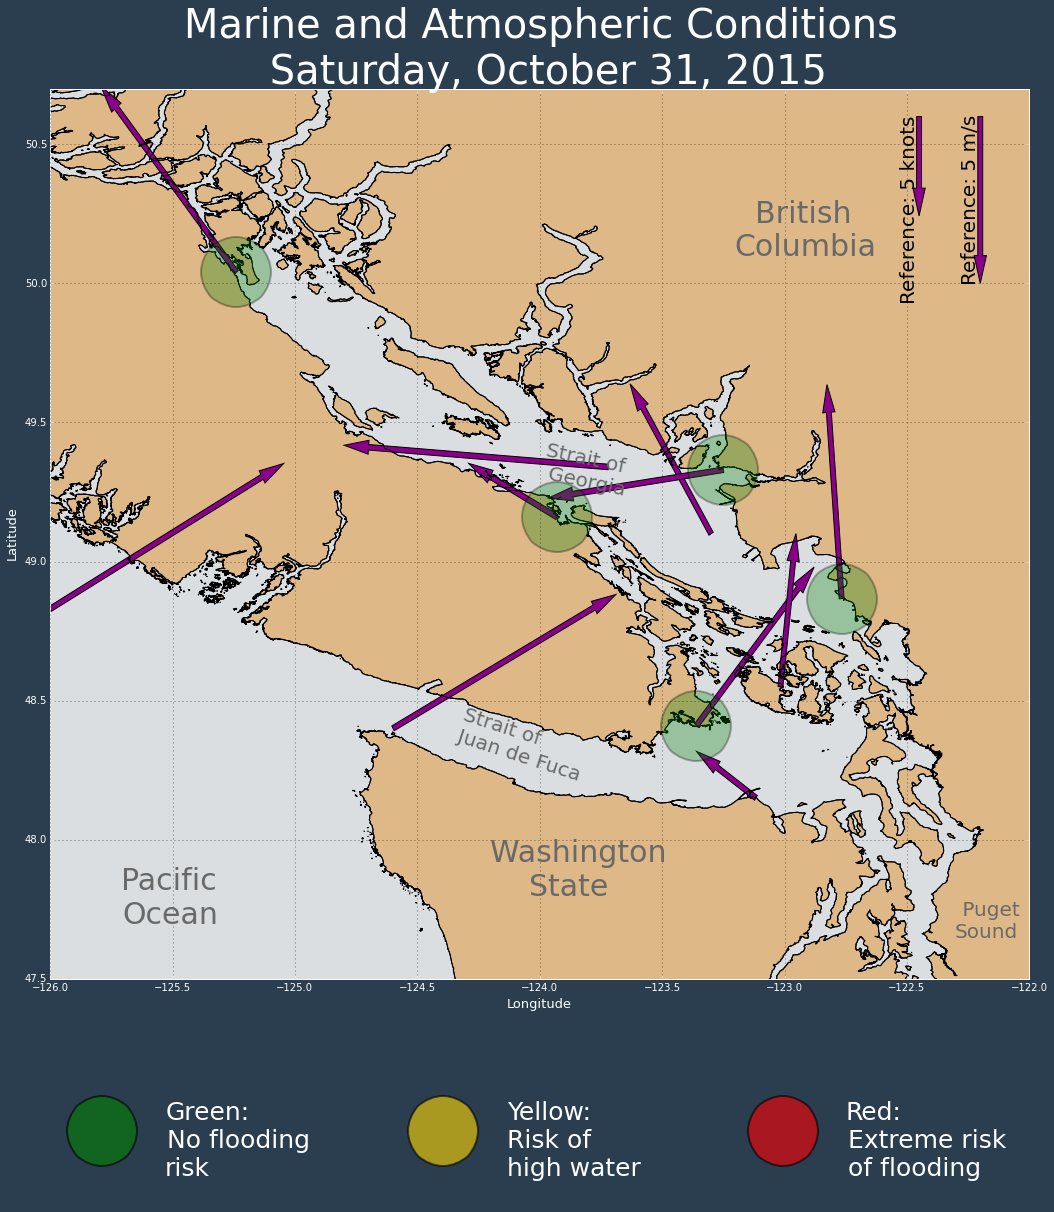

In [18]:
fig=figures.website_thumbnail(bathy, grid_T_hr, grids, model_path,coastline)